In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = pd.read_csv('epa-sea-level.csv')

In [7]:
df.shape

(134, 5)

<AxesSubplot:xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

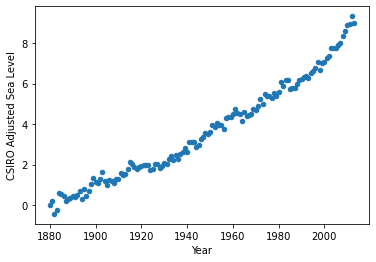

In [8]:
# create scatter plot
df.plot(x='Year', y='CSIRO Adjusted Sea Level', kind='scatter') # seems overly simple

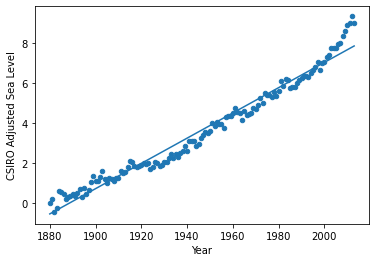

In [9]:
# testing out the linear regression scipi method
res = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
df.plot(x='Year', y='CSIRO Adjusted Sea Level', kind='scatter') # seems overly simple
plt.plot(df['Year'], res.intercept + res.slope * df['Year'])    # this might be working?

In [10]:
# plot line of best fit thru year 2050 to predict sea level rise in 2050
# start by appending years to the year column to go to 2050
res = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
append_years = []
for x in range(df['Year'].min(), 2051):
    if x <= df['Year'].max():
        pass
    else:
        append_years.append({'Year': x})
df = df.append(append_years, ignore_index=True)

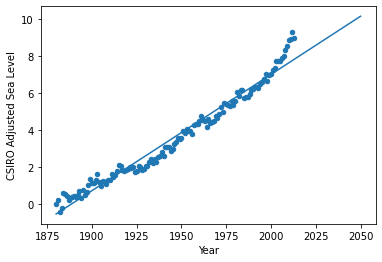

In [11]:
df.plot(x='Year', y='CSIRO Adjusted Sea Level', kind='scatter') # seems overly simple
plt.plot(df['Year'], res.intercept + res.slope * df['Year'])    # this might be working?

In [ ]:
df['Year'].max()    # not important

In [21]:
df2 = df[(df.Year >= 2000) & (df.Year <= 2013)]
df2

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


Text(0, 0.5, 'Sea Level (Inches)')

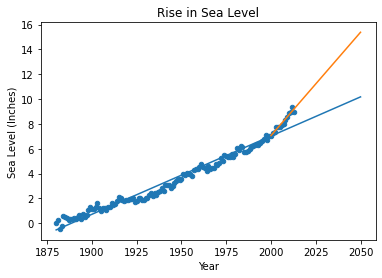

In [27]:
# recalc line of best fit using data from 2000-end of dataset
new_res = linregress(df2['Year'], df2['CSIRO Adjusted Sea Level'])

# original plot, going to 2050
df.plot(x='Year', y='CSIRO Adjusted Sea Level', kind='scatter') # seems overly simple

# add first line of best fit
plt.plot(df['Year'], res.intercept + res.slope * df['Year'])    # this might be working?

# add addtl years to df2
append_years = []
for x in range(df2['Year'].min(), 2051):
    if x <= df2['Year'].max():
        pass
    else:
        append_years.append({'Year': x})
df2 = df2.append(append_years, ignore_index=True)

# add second line of best fit
plt.plot(df2['Year'], new_res.intercept + new_res.slope * df2['Year'])

# add titles
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (Inches)')